# CT Slice Quality Assessment with VLLM
Adapted from the LabelCritic repo. This notebook:
1. Loads 5 random CT slices from a specified folder.
2. Prepares a prompt asking the VLLM to rate image quality (1–5).
3. Sends the prompt and images to the VLLM server.
4. Prints out the model's response.


In [1]:
import os
import random
from PIL import Image
from io import BytesIO
import base64
import requests
from ErrorDetector import CreateConversation  # assumes LabelCritic repo is in your PYTHONPATH

def encode_image(img_path, solid_overlay=False):
    image = Image.open(img_path).convert("RGB")
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [2]:
# === Configuration ===
ct_slice_dir = "/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/"  # <-- CHANGE THIS
vllm_url = "http://localhost:8000/v1/chat/completions"  # Update if your VLLM uses a different port

prompt_text = "Give score 1–5, how good is the image quality?"
num_slices = 5

In [3]:
# === Sample 5 random CT slices ===
all_slices = [os.path.join(ct_slice_dir, f) for f in os.listdir(ct_slice_dir) if f.lower().endswith(('.png', '.jpg'))]
sampled_slices = random.sample(all_slices, num_slices)

for s in sampled_slices:
    print(f"Selected: {s}")

Selected: /home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice2.png
Selected: /home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice4.png
Selected: /home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice1.png
Selected: /home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice5.png
Selected: /home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice3.png


img_file_list: ['/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice2.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice4.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice1.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice5.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice3.png']


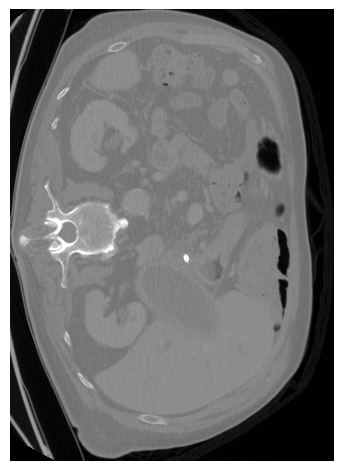

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 118308 bytes


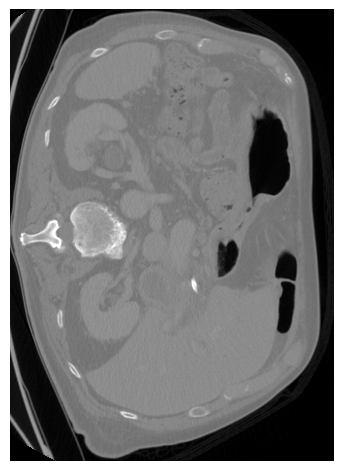

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 118160 bytes


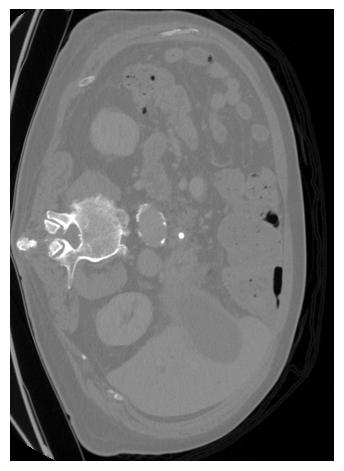

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 117449 bytes


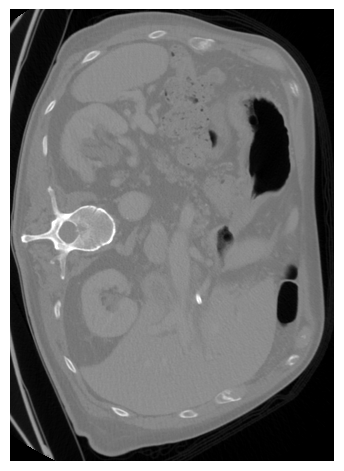

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 119536 bytes


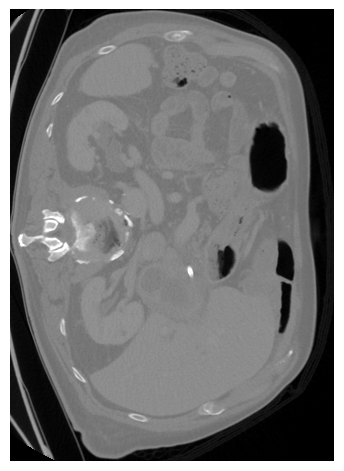

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 118896 bytes


In [4]:
# === Create VLLM conversation ===
conversation = CreateConversation(
    img_file_list=sampled_slices,
    text=prompt_text,
    conver=[],
    prt=True
)

In [5]:
# === Send prompt to VLLM ===
payload = {
    "model": "Qwen/Qwen2-VL-72B-Instruct-AWQ",  # <-- must match what you loaded
    "messages": conversation,  # still fine if format matches
    "temperature": 0.2
}

response = requests.post(vllm_url, json=payload)
response.raise_for_status()
print("Model response:")
print(response.json()["choices"][0]["message"]["content"])

Model response:
The image quality appears to be quite good. The details of the internal structures are clearly visible, and the contrast between different tissues is well-defined. Therefore, I would give this image a score of 4 out of 5.


⚠️ No slices found for .ipynb_checkpoints
img_file_list: ['/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice1.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice2.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice3.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice4.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000087/BDMAP_00000087_slice5.png']


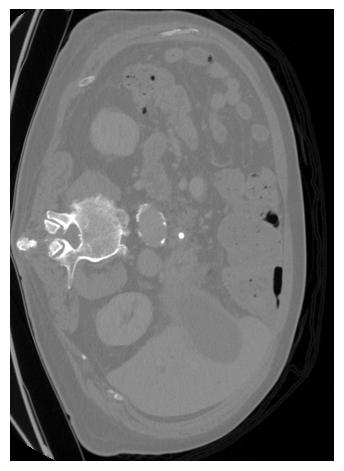

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 117449 bytes


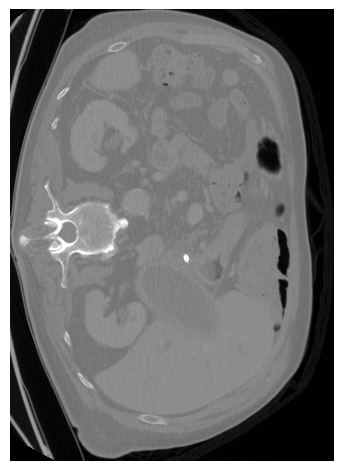

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 118308 bytes


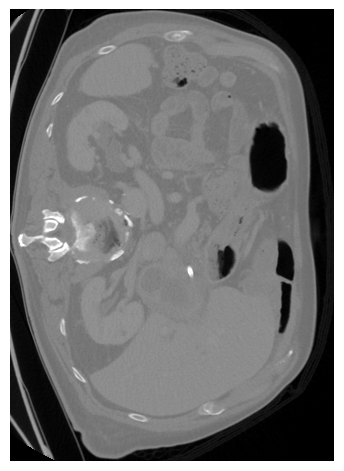

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 118896 bytes


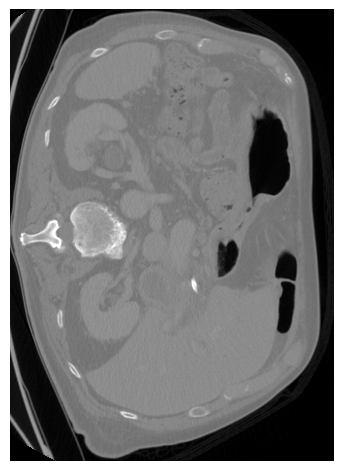

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 118160 bytes


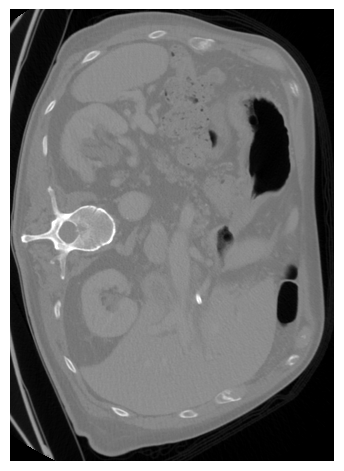

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (324, 452), File Size: 119536 bytes

📌 Patient BDMAP_00000087 response:
The image quality appears to be quite good. The details of the internal structures are clearly visible, and the contrast is well-balanced. Therefore, I would give this image a score of 4 out of 5.

img_file_list: ['/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000093/BDMAP_00000093_slice1.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000093/BDMAP_00000093_slice2.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000093/BDMAP_00000093_slice3.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000093/BDMAP_00000093_slice4.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000093/BDMAP_00000093_slice5.png']


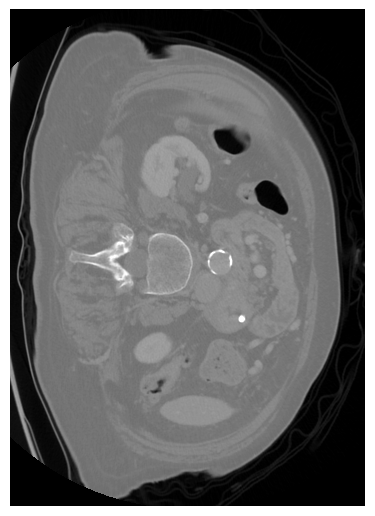

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (355, 497), File Size: 129790 bytes


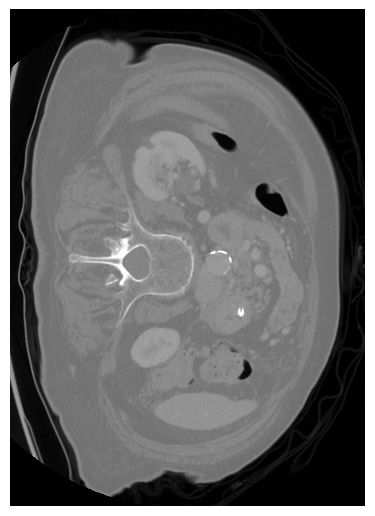

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (355, 497), File Size: 130407 bytes


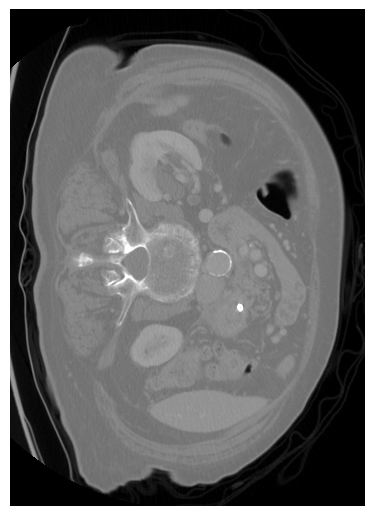

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (355, 497), File Size: 130589 bytes


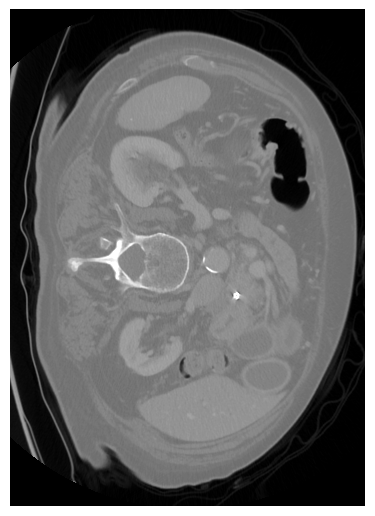

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (355, 497), File Size: 133330 bytes


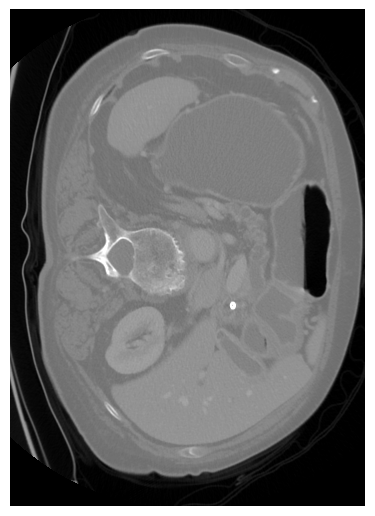

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (355, 497), File Size: 130959 bytes

📌 Patient BDMAP_00000093 response:
The image quality appears to be good, with clear and detailed structures visible. I would rate it a 4 out of 5.

img_file_list: ['/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000192/BDMAP_00000192_slice1.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000192/BDMAP_00000192_slice2.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000192/BDMAP_00000192_slice3.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000192/BDMAP_00000192_slice4.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000192/BDMAP_00000192_slice5.png']


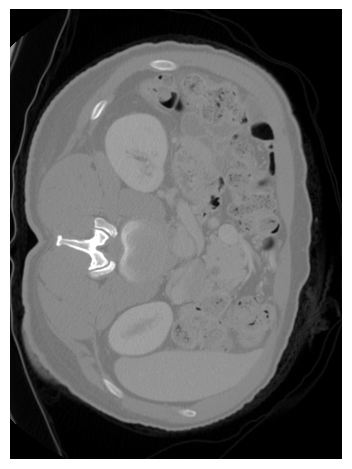

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (332, 450), File Size: 111585 bytes


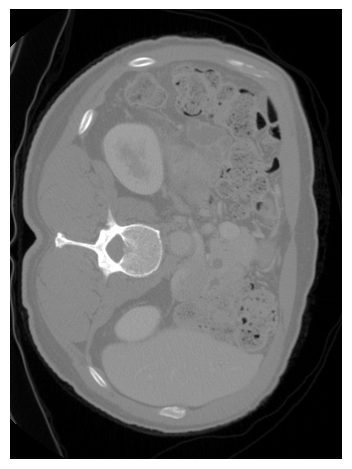

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (332, 450), File Size: 113445 bytes


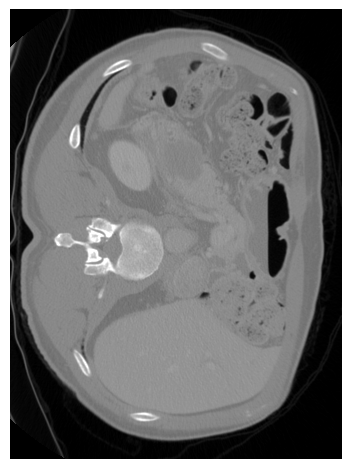

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (332, 450), File Size: 119769 bytes


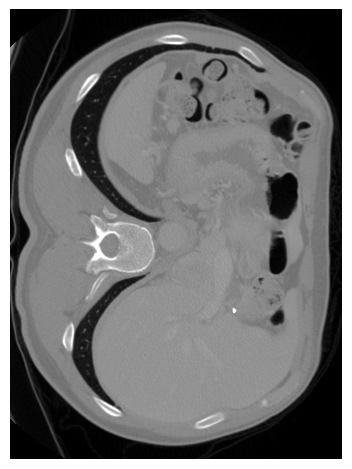

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (332, 450), File Size: 125030 bytes


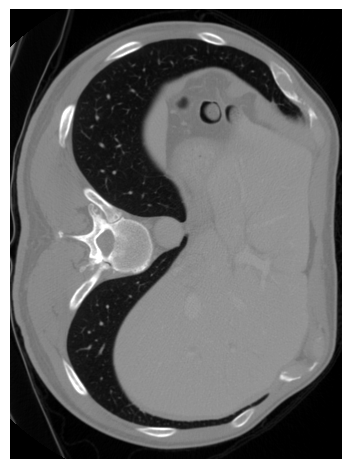

Top pixel: (0, 0, 0, 255)
Image Size (WxH) in prompt: (332, 450), File Size: 124529 bytes

📌 Patient BDMAP_00000192 response:
The image quality appears to be quite good. The details of the internal structures are clearly visible, and the contrast is well-balanced. Therefore, I would give this image a score of 4 out of 5.

img_file_list: ['/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000225/BDMAP_00000225_slice1.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000225/BDMAP_00000225_slice2.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000225/BDMAP_00000225_slice3.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000225/BDMAP_00000225_slice4.png', '/home/ubuntu/Touchstone/data/mvp_ct_slices/BDMAP_00000225/BDMAP_00000225_slice5.png']


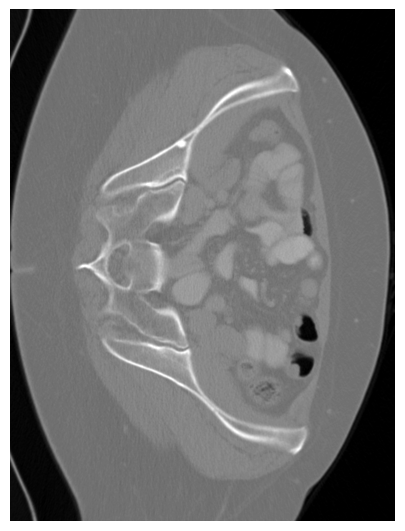

Top pixel: (10, 10, 10, 255)
Image Size (WxH) in prompt: (385, 512), File Size: 142620 bytes


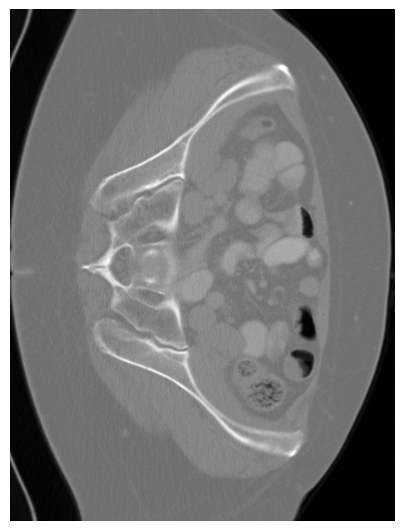

Top pixel: (11, 11, 11, 255)
Image Size (WxH) in prompt: (385, 512), File Size: 142252 bytes


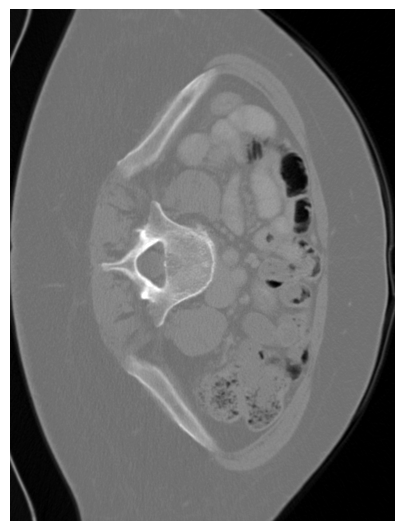

Top pixel: (10, 10, 10, 255)
Image Size (WxH) in prompt: (385, 512), File Size: 140457 bytes


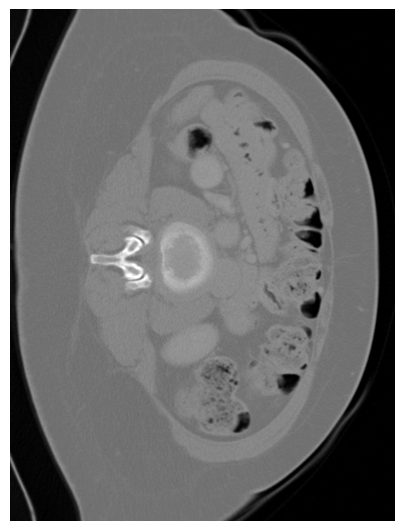

Top pixel: (10, 10, 10, 255)
Image Size (WxH) in prompt: (385, 512), File Size: 139454 bytes


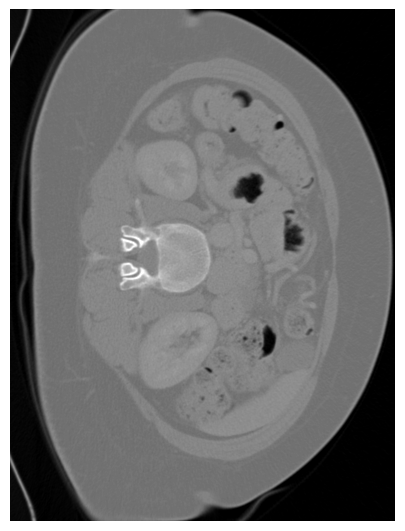

Top pixel: (9, 9, 9, 255)
Image Size (WxH) in prompt: (385, 512), File Size: 135132 bytes

📌 Patient BDMAP_00000225 response:
The image quality appears to be quite good. The details of the internal structures are clearly visible, and the contrast is well-balanced. The resolution seems high enough to distinguish fine details. Based on these observations, I would give this image a score of 4 out of 5.



In [6]:
import os
from glob import glob

base_dir = "/home/ubuntu/Touchstone/data/mvp_ct_slices"  # 🔁 update this
patient_dirs = sorted(os.listdir(base_dir))

for patient_id in patient_dirs:
    slice_paths = sorted(glob(os.path.join(base_dir, patient_id, "*.png")))
    
    if len(slice_paths) == 0:
        print(f"⚠️ No slices found for {patient_id}")
        continue

    conversation = CreateConversation(
        img_file_list=slice_paths,
        text="Give score 1–5, how good is the image quality?",
        conver=[]
    )

    payload = {
        "model": "Qwen/Qwen2-VL-72B-Instruct-AWQ",
        "messages": conversation,
        "temperature": 0.2
    }

    response = requests.post(vllm_url, json=payload)
    try:
        response.raise_for_status()
        content = response.json()["choices"][0]["message"]["content"]
        print(f"\n📌 Patient {patient_id} response:\n{content}\n")
    except requests.exceptions.HTTPError as e:
        print(f"\n❌ Error for patient {patient_id}: {e}")
        print(response.text)